### simple Database update

In [3]:
import pandas as pd

In [4]:
#load in the *.csv that gonna be updated
db_house_raw = pd.read_csv('real_estate_price_size_year.csv')

In [5]:
db_house = db_house_raw.copy()

In [6]:
db_house.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [7]:
import seaborn as sns

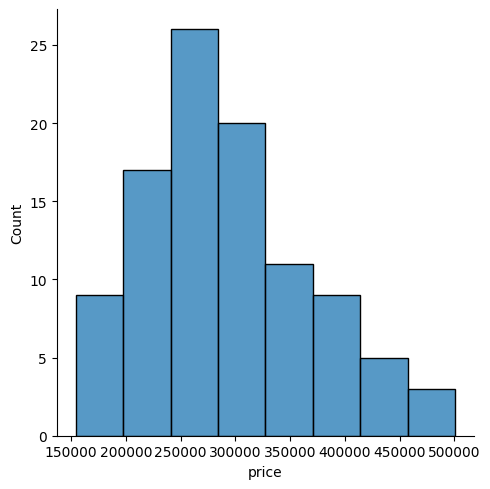

In [8]:
sns.displot(db_house['price'])

### Create bedroom column

In [9]:
import random

def assign_bedrooms(price):
    if price <= int(
        db_house['price'].mean()) - int(0.5 *db_house['price'].std()):
        return random.randint(1,2)
    elif price <= int(
        db_house['price'].mean()) + int(0.2 *db_house['price'].std()):
        return random.randint(1,3)
    elif price <= int(
        db_house['price'].mean()) + int(1.2 *db_house['price'].std()):
        return random.randint(2,3)
    else:
        return 4

In [10]:
db_house['bedrooms'] = db_house['price'].apply(assign_bedrooms)

In [2]:
import matplotlib.pyplot as plt

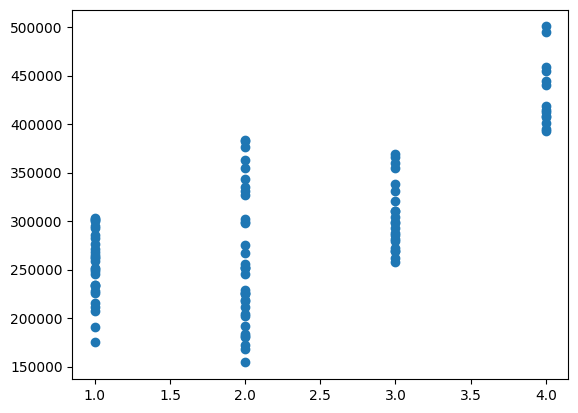

In [11]:
plt.scatter(db_house['bedrooms'], db_house['price'])
plt.show()

### Create pool_available column

In [12]:
db1 = db_house.query('bedrooms == 1') # 240000 up pool

In [13]:
db2 = db_house.query('bedrooms == 2') # 300000

In [14]:
db3 = db_house.query('bedrooms == 3') # 350000

In [15]:
db4 = db_house.query('bedrooms == 4') # 420000

In [16]:
def db1_pool_add(price):
    if price >= 240000:
        return 1
    else:
        return 0
def db2_pool_add(price):
    if price >= 300000:
        return 1
    else:
        return 0
def db3_pool_add(price):
    if price >= 350000:
        return 1
    else:
        return 0
def db4_pool_add(price):
    if price >= 420000:
        return 1
    else:
        return 0

In [17]:
db1['pool_available'] = db1['price'].apply(db1_pool_add)
db2['pool_available'] = db2['price'].apply(db2_pool_add)
db3['pool_available'] = db3['price'].apply(db3_pool_add)
db4['pool_available'] = db4['price'].apply(db4_pool_add)

C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_15256\52159373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['pool_available'] = db1['price'].apply(db1_pool_add)
C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_15256\52159373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db2['pool_available'] = db2['price'].apply(db2_pool_add)
C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_15256\52159373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [18]:
db_house_with_pool = pd.DataFrame()
db_house_with_pool = pd.concat([db1, db2, db3, db4],ignore_index=False,)
db_house_updated = db_house_with_pool.sort_index()

In [19]:
db_house_updated

,price,size,year,bedrooms,pool_available
0,234314.144,643.09,2015,1,0
1,228581.528,656.22,2009,2,0
2,281626.336,487.29,2018,3,0
3,401255.608,1504.75,2015,4,0
4,458674.256,1275.46,2009,4,1
...,...,...,...,...,...
95,252460.400,549.80,2009,2,0
96,310522.592,1037.44,2009,3,0
97,383635.568,1504.75,2006,2,1
98,225145.248,648.29,2015,2,0


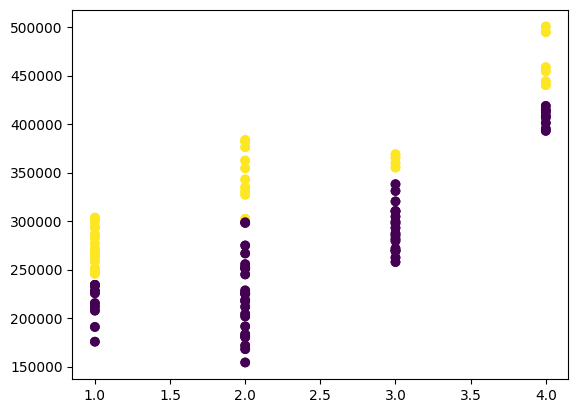

In [21]:
plt.scatter(db_house_updated['bedrooms'], db_house['price'], c = db_house_updated['pool_available'])
plt.show()

garage

In [22]:
db_house_updated

,price,size,year,bedrooms,pool_available
0,234314.144,643.09,2015,1,0
1,228581.528,656.22,2009,2,0
2,281626.336,487.29,2018,3,0
3,401255.608,1504.75,2015,4,0
4,458674.256,1275.46,2009,4,1
...,...,...,...,...,...
95,252460.400,549.80,2009,2,0
96,310522.592,1037.44,2009,3,0
97,383635.568,1504.75,2006,2,1
98,225145.248,648.29,2015,2,0


In [23]:
def db1_garage_add(price):
    if 200000 <= price <= 240000:
        return 1
    else:
        return 0
def db2_garage_add(price):
    if 270000 <= price <= 300000:
        return 1
    else:
        return 0
def db3_garage_add(price):
    if 340000 <= price <= 360000:
        return 1
    else:
        return 0
def db4_garage_add(price):
    if 420000 <= price <= 460000:
        return 1
    else:
        return 0

In [24]:
db1['garage'] = db1['price'].apply(db1_garage_add)
db2['garage'] = db2['price'].apply(db2_garage_add)
db3['garage'] = db3['price'].apply(db3_garage_add)
db4['garage'] = db4['price'].apply(db4_garage_add)

C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_15256\4177046460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['garage'] = db1['price'].apply(db1_garage_add)
C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_15256\4177046460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db2['garage'] = db2['price'].apply(db2_garage_add)
C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_15256\4177046460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [25]:
db_house_with_garage = pd.DataFrame()
db_house_with_garage = pd.concat([db1, db2, db3, db4],ignore_index=False,)
db_house_updated2 = db_house_with_garage.sort_index()

In [26]:
db_house_updated2

,price,size,year,bedrooms,pool_available,garage
0,234314.144,643.09,2015,1,0,1
1,228581.528,656.22,2009,2,0,0
2,281626.336,487.29,2018,3,0,0
3,401255.608,1504.75,2015,4,0,0
4,458674.256,1275.46,2009,4,1,1
...,...,...,...,...,...,...
95,252460.400,549.80,2009,2,0,0
96,310522.592,1037.44,2009,3,0,0
97,383635.568,1504.75,2006,2,1,0
98,225145.248,648.29,2015,2,0,0


In [27]:
db_house_updated2['pool_available'] =  db_house_updated2['pool_available'].replace(to_replace={0: 'no', 1: 'yes'})

In [28]:
db_house_updated2['garage'] =  db_house_updated2['garage'].replace(to_replace={0: 'no', 1: 'yes'})

In [29]:
db_house_updated2.head()

,price,size,year,bedrooms,pool_available,garage
0,234314.144,643.09,2015,1,no,yes
1,228581.528,656.22,2009,2,no,no
2,281626.336,487.29,2018,3,no,no
3,401255.608,1504.75,2015,4,no,no
4,458674.256,1275.46,2009,4,yes,yes


In [30]:
db_house_updated2.to_csv('db_house_update_by_me.csv', index=False)

In [31]:
data = pd.read_csv('db_house_update_by_me.csv')

In [32]:
data, db_house_raw

(         price     size  year  bedrooms pool_available garage
 0   234314.144   643.09  2015         1             no    yes
 1   228581.528   656.22  2009         2             no     no
 2   281626.336   487.29  2018         3             no     no
 3   401255.608  1504.75  2015         4             no     no
 4   458674.256  1275.46  2009         4            yes    yes
 ..         ...      ...   ...       ...            ...    ...
 95  252460.400   549.80  2009         2             no     no
 96  310522.592  1037.44  2009         3             no     no
 97  383635.568  1504.75  2006         2            yes     no
 98  225145.248   648.29  2015         2             no     no
 99  274922.856   705.29  2006         2             no    yes
 
 [100 rows x 6 columns],
          price     size  year
 0   234314.144   643.09  2015
 1   228581.528   656.22  2009
 2   281626.336   487.29  2018
 3   401255.608  1504.75  2015
 4   458674.256  1275.46  2009
 ..         ...      ...   ...


In [33]:
data.describe(include='all')

,price,size,year,bedrooms,pool_available,garage
count,100.000000,100.000000,100.000000,100.00000,100,100
unique,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,no,no
freq,NaN,NaN,NaN,NaN,61,83
mean,292289.470160,853.024200,2012.600000,2.21000,NaN,NaN
std,77051.727525,297.941951,4.729021,1.01797,NaN,NaN
min,154282.128000,479.750000,2006.000000,1.00000,NaN,NaN
25%,234280.148000,643.330000,2009.000000,1.00000,NaN,NaN
50%,280590.716000,696.405000,2015.000000,2.00000,NaN,NaN
75%,335723.696000,1029.322500,2018.000000,3.00000,NaN,NaN


In [32]:
data['pool_available'] =  data['pool_available'].replace(to_replace={'no': 0, 'yes': 1})
data['garage'] =  data['garage'].replace(to_replace={'no': 0, 'yes': 1})

<b>/--------/ *IDEA* /-----/</b><br>
    <br>
    where there's pool + garage, there maybe set pool to 'common pool'
    <br>
    

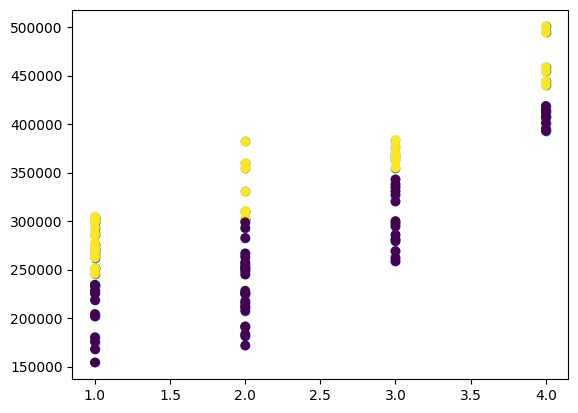

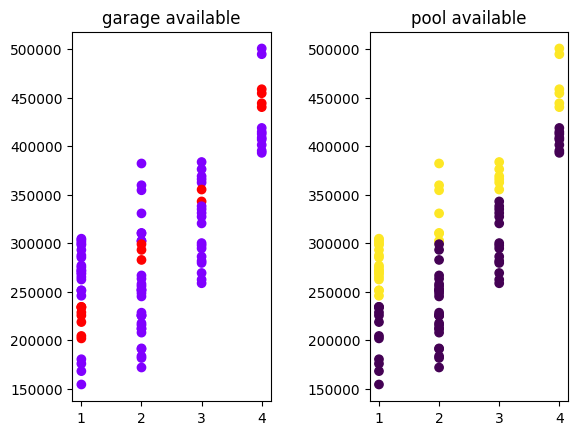

In [33]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(data['bedrooms'], data['price'], c=data['garage'], cmap='rainbow')
ax2.scatter(data['bedrooms'], data['price'], c=data['pool_available'], cmap='viridis')
ax1.set_title('garage available')
ax2.set_title('pool available')
plt.subplots_adjust(wspace=0.5)
plt.show()

# Sales crew data

In [34]:
salesforce = pd.DataFrame()
salesforce['First Name'] = ['Jack', 'Samuel', 'Ann', 'Samantha', 'Bill' ]
salesforce['Last Name'] = ['Olfred', 'Bishop', 'Smith', 'Abbedy', 'Cosby']
salesforce

,First Name,Last Name
0,Jack,Olfred
1,Samuel,Bishop
2,Ann,Smith
3,Samantha,Abbedy
4,Bill,Cosby


In [35]:
salesforce['employeeID'] = [1001, 1002, 1003, 1004,1005]
salesforce

,First Name,Last Name,employeeID
0,Jack,Olfred,1001
1,Samuel,Bishop,1002
2,Ann,Smith,1003
3,Samantha,Abbedy,1004
4,Bill,Cosby,1005
